In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_columns', 500)

In [31]:
df = pd.read_csv("/volumes/roussou/Microscopy/CellAsic/Atp6_NG_x_Atp6_mKate_WT/all_exp/all_exp/multiExp_AllPos_acdc_output_3d_all_wt_diploids_correct.csv") 

In [32]:
df

,experiment_foldername,Position_n,Cell_ID,frame_i,time_seconds,time_minutes,time_hours,BF_CV,BF_amount_autoBkgr,BF_amount_dataPrepBkgr,BF_amount_manualBkgr,BF_autoBkgr_bkgrVal_mean,BF_autoBkgr_bkgrVal_median,BF_autoBkgr_bkgrVal_q05,BF_autoBkgr_bkgrVal_q25,BF_autoBkgr_bkgrVal_q75,BF_autoBkgr_bkgrVal_q95,BF_concentration_autoBkgr_from_vol_fl,BF_concentration_autoBkgr_from_vol_vox,BF_concentration_dataPrepBkgr_from_vol_fl,BF_concentration_dataPrepBkgr_from_vol_vox,BF_dataPrepBkgr_bkgrVal_mean,BF_dataPrepBkgr_bkgrVal_median,BF_dataPrepBkgr_bkgrVal_q05,BF_dataPrepBkgr_bkgrVal_q25,BF_dataPrepBkgr_bkgrVal_q75,BF_dataPrepBkgr_bkgrVal_q95,BF_manualBkgr_bkgrVal_mean,BF_manualBkgr_bkgrVal_median,BF_manualBkgr_bkgrVal_q05,BF_manualBkgr_bkgrVal_q25,BF_manualBkgr_bkgrVal_q75,BF_manualBkgr_bkgrVal_q95,BF_max,BF_mean,BF_mean_manualBkgr,BF_median,BF_min,BF_q05,BF_q25,BF_q75,BF_q95,BF_sum,NG_CV,NG_amount_autoBkgr,NG_amount_dataPrepBkgr,NG_amount_manualBkgr,NG_autoBkgr_bkgrVal_mean,NG_autoBkgr_bkgrVal_median,NG_autoBkgr_bkgrVal_q05,NG_autoBkgr_bkgrVal_q25,NG_autoBkgr_bkgrVal_q75,NG_autoBkgr_bkgrVal_q95,NG_concentration_autoBkgr_from_vol_fl,NG_concentration_autoBkgr_from_vol_vox,NG_concentration_dataPrepBkgr_from_vol_fl,NG_concentration_dataPrepBkgr_from_vol_vox,NG_dataPrepBkgr_bkgrVal_mean,NG_dataPrepBkgr_bkgrVal_median,NG_dataPrepBkgr_bkgrVal_q05,NG_dataPrepBkgr_bkgrVal_q25,NG_dataPrepBkgr_bkgrVal_q75,NG_dataPrepBkgr_bkgrVal_q95,NG_manualBkgr_bkgrVal_mean,NG_manualBkgr_bkgrVal_median,NG_manualBkgr_bkgrVal_q05,NG_manualBkgr_bkgrVal_q25,NG_manualBkgr_bkgrVal_q75,NG_manualBkgr_bkgrVal_q95,NG_max,NG_mean,NG_mean_manualBkgr,NG_median,NG_min,NG_q05,NG_q25,NG_q75,NG_q95,NG_sum,_NG_3D_manualBkgr_bkgrVal_mean_maxProj,_NG_3D_manualBkgr_bkgrVal_mean_meanProj,_NG_3D_manualBkgr_bkgrVal_mean_zSlice,_NG_3D_manualBkgr_bkgrVal_median_maxProj,_NG_3D_manualBkgr_bkgrVal_median_meanProj,_NG_3D_manualBkgr_bkgrVal_median_zSlice,_NG_3D_manualBkgr_bkgrVal_q05_maxProj,_NG_3D_manualBkgr_bkgrVal_q05_meanProj,_NG_3D_manualBkgr_bkgrVal_q05_zSlice,_NG_3D_manualBkgr_bkgrVal_q25_maxProj,_NG_3D_manualBkgr_bkgrVal_q25_meanProj,_NG_3D_manualBkgr_bkgrVal_q25_zSlice,_NG_3D_manualBkgr_bkgrVal_q75_maxProj,_NG_3D_manualBkgr_bkgrVal_q75_meanProj,_NG_3D_manualBkgr_bkgrVal_q75_zSlice,_NG_3D_manualBkgr_bkgrVal_q95_maxProj,_NG_3D_manualBkgr_bkgrVal_q95_meanProj,_NG_3D_manualBkgr_bkgrVal_q95_zSlice,_mKate_3D_manualBkgr_bkgrVal_mean_maxProj,_mKate_3D_manualBkgr_bkgrVal_mean_meanProj,_mKate_3D_manualBkgr_bkgrVal_mean_zSlice,_mKate_3D_manualBkgr_bkgrVal_median_maxProj,_mKate_3D_manualBkgr_bkgrVal_median_meanProj,_mKate_3D_manualBkgr_bkgrVal_median_zSlice,_mKate_3D_manualBkgr_bkgrVal_q05_maxProj,_mKate_3D_manualBkgr_bkgrVal_q05_meanProj,_mKate_3D_manualBkgr_bkgrVal_q05_zSlice,_mKate_3D_manualBkgr_bkgrVal_q25_maxProj,_mKate_3D_manualBkgr_bkgrVal_q25_meanProj,_mKate_3D_manualBkgr_bkgrVal_q25_zSlice,_mKate_3D_manualBkgr_bkgrVal_q75_maxProj,_mKate_3D_manualBkgr_bkgrVal_q75_meanProj,_mKate_3D_manualBkgr_bkgrVal_q75_zSlice,_mKate_3D_manualBkgr_bkgrVal_q95_maxProj,_mKate_3D_manualBkgr_bkgrVal_q95_meanProj,_mKate_3D_manualBkgr_bkgrVal_q95_zSlice,cell_cycle_stage,corrected_assignment,division_frame_i,emerg_frame_i,generation_num,is_cell_dead,is_cell_excluded,is_history_known,mKate_CV,mKate_amount_autoBkgr,mKate_amount_dataPrepBkgr,mKate_amount_manualBkgr,mKate_autoBkgr_bkgrVal_mean,mKate_autoBkgr_bkgrVal_median,mKate_autoBkgr_bkgrVal_q05,mKate_autoBkgr_bkgrVal_q25,mKate_autoBkgr_bkgrVal_q75,mKate_autoBkgr_bkgrVal_q95,mKate_concentration_autoBkgr_from_vol_fl,mKate_concentration_autoBkgr_from_vol_vox,mKate_concentration_dataPrepBkgr_from_vol_fl,mKate_concentration_dataPrepBkgr_from_vol_vox,mKate_dataPrepBkgr_bkgrVal_mean,mKate_dataPrepBkgr_bkgrVal_median,mKate_dataPrepBkgr_bkgrVal_q05,mKate_dataPrepBkgr_bkgrVal_q25,mKate_dataPrepBkgr_bkgrVal_q75,mKate_dataPrepBkgr_bkgrVal_q95,mKate_manualBkgr_bkgrVal_mean,mKate_manualBkgr_bkgrVal_median,mKate_manualBkgr_bkgrVal_q05,mKate_manualBkgr_bkgrVal_q25,mKate_manua

In [4]:
df_clean = df[
    [
        "experiment_foldername",
        "Position_n",
        "frame_i",
        "Cell_ID",
        "relationship",
        "relative_ID",
        "cell_vol_fl",
        "division_frame_i",
        "emerg_frame_i",
        "generation_num", 
       "_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj",
        "_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj",
       "_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj",
        "_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj",
    ]
]

df_clean["exp_pos"] = df[["experiment_foldername", "Position_n"]].apply(
    "_".join, axis=1
)

df_clean["exp_pos_cell"] = (
    df_clean["experiment_foldername"]
    + "_"
    + df_clean["Position_n"].astype(str)
    + "_"
    + df_clean["Cell_ID"].astype(str)
)

# df_clean["time_hours"] = df_clean["time_hours"] * 1000

df_clean = df_clean[df_clean.frame_i <= 32]

df_clean["time"] = (15 * df_clean["frame_i"]).div(60)

<ipython-input-4-24a5e8706eea>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["exp_pos"] = df[["experiment_foldername", "Position_n"]].apply(
<ipython-input-4-24a5e8706eea>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["exp_pos_cell"] = (


In [5]:
# Haploid homoplasmic cells that never mated in diploid videos
# taken for estimating bleed-through fluorescence

homo_ng_cells = df_clean.loc[df_clean['exp_pos_cell'].isin(
    ['exp1_Position_1_506', 'exp1_Position_1_507'
    'exp5_Position_2_2807','exp5_Position_2_2808', 
    'exp5_Position_1_1302', 'exp5_Position_1_1303',
    'exp4_Position_4_2201', 'exp4_Position_4_2202',
    'exp4_Position_2_1828', 'exp4_Position_2_1830'])]
homo_ng_cells

homo_mk_cells = df_clean.loc[df_clean['exp_pos_cell'].isin(
    ['exp5_Position_1_1300', 'exp5_Position_1_1301',
    'exp5_Position_2_2802','exp5_Position_2_2806',
    'exp4_Position_4_2198', 'exp4_Position_4_2200', 
    'exp4_Position_5_1045','exp4_Position_5_1046',
    'exp4_Position_2_1827', 'exp4_Position_2_1829'])]
homo_mk_cells

,experiment_foldername,Position_n,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,division_frame_i,emerg_frame_i,generation_num,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj,exp_pos,exp_pos_cell,time
454,exp5,Position_1,32,1300,mother,-1.0,126.644900,-1.0,-1.0,2.0,46.663282,61.876423,799.155752,1234.903566,exp5_Position_1,exp5_Position_1_1300,8.00
455,exp5,Position_1,32,1301,mother,-1.0,59.598988,-1.0,-1.0,2.0,32.936002,52.466535,975.456006,1534.866275,exp5_Position_1,exp5_Position_1_1301,8.00
1149,exp5,Position_2,32,2802,mother,-1.0,150.745733,-1.0,-1.0,2.0,36.700715,19.278758,790.722218,805.240516,exp5_Position_2,exp5_Position_2_2802,8.00
1152,exp5,Position_2,32,2806,mother,-1.0,113.116345,-1.0,-1.0,2.0,34.296336,13.200484,644.067165,661.647042,exp5_Position_2,exp5_Position_2_2806,8.00
6300,exp4,Position_2,31,1827,NaN,NaN,145.215802,NaN,NaN,NaN,1558.376909,1437.702648,757.713355,543.395868,exp4_Position_2,exp4_Position_2_1827,7.75
6302,exp4,Position_2,31,1829,NaN,NaN,136.330295,NaN,NaN,NaN,1438.521052,1315.657679,655.758238,437.552887,exp4_Position_2,exp4_Position_2_1829,7.75
6705,exp4,Position_2,32,1827,NaN,NaN,155.604933,NaN,NaN,NaN,1713.049807,1557.701261,825.684744,566.127236,exp4_Position_2,exp4_Position_2_1827,8.00
6707,exp4,Position_2,32,1829,NaN,NaN,97.764050,NaN,NaN,NaN,1888.054517,1721.725484,748.223714,470.319926,exp4_Position_2,exp4_Position_2_1829,8.00
7433,exp4,Position_4,31,2198,mother,-1.0,91.694202,-1.0,-1.0,2.0,98.493012,52.926439,1576.254832,1535.484741,exp4_Position_4,exp4_Position_4_2198,7.75
7434,exp4,Position_4,31,2200,mother,-1.0,110.706653,-1.0,-1.0,2.0,95.888331,56.463678,1611.101610,1575.826920,exp4_Position_4,exp4_Position_4_2200,7.75


In [6]:
# excluding haploid cells
df_clean = df_clean[~df_clean['exp_pos_cell'].isin(homo_ng_cells['exp_pos_cell']) &
                      ~df_clean['exp_pos_cell'].isin(homo_mk_cells['exp_pos_cell'])]

In [7]:
# normalising factors for median per frame and per pos
frame_ng = df_clean.groupby(["exp_pos", 'frame_i'])["_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj"].median()
frame_mk = df_clean.groupby(["exp_pos", 'frame_i'])["_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj"].median()

In [9]:
normalization_factors_3 = (
    pd.merge(
        frame_ng,
        frame_mk,
        left_index=True,
        right_index=True,
        suffixes=("", "_right"),
    )
    .rename(
        columns={
            "_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj": "ng_norm_factor",
            "_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj": "mkate_norm_factor",
        }
    )
)

normalization_factors_3

ng_norm_factor  mkate_norm_factor
exp_pos         frame_i                                   
exp1_Position_1 0            404.996239         135.358364
                1            374.429163         138.977127
                2            332.737695         134.873732
                3            432.121268         155.842697
                4            419.805957         154.794215
...                                 ...                ...
exp5_Position_3 28          1045.362238         541.217537
                29          1030.056648         525.124168
                30          1067.949398         494.264552
                31          1129.176810         508.953477
                32          1150.558799         571.680987

[297 rows x 2 columns]

In [10]:
# normalising to the median value of mkate or ng of each frame specifically for each exp_pos !

df_norm_3 = pd.merge(
    df_clean, normalization_factors_3, left_on=["exp_pos", "frame_i"], right_on=["exp_pos", "frame_i"]
)
df_norm_3

,experiment_foldername,Position_n,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,division_frame_i,emerg_frame_i,generation_num,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj,exp_pos,exp_pos_cell,time,ng_norm_factor,mkate_norm_factor
0,exp5,Position_1,0,4,mother,-1.0,192.422420,-1.0,-1.0,1.0,998.311792,995.254531,558.862457,563.957893,exp5_Position_1,exp5_Position_1_4,0.00,995.254531,563.957893
1,exp5,Position_1,1,4,mother,-1.0,231.171137,-1.0,-1.0,1.0,920.249378,916.479753,523.141186,527.853218,exp5_Position_1,exp5_Position_1_4,0.25,916.479753,527.853218
2,exp5,Position_1,2,4,mother,12.0,225.112696,-1.0,-1.0,1.0,962.851917,959.913706,552.620776,557.517794,exp5_Position_1,exp5_Position_1_4,0.50,1829.195543,918.273603
3,exp5,Position_1,2,12,bud,4.0,2.227694,-1.0,2.0,0.0,2709.892133,2698.477380,1260.004826,1279.029413,exp5_Position_1,exp5_Position_1_12,0.50,1829.195543,918.273603
4,exp5,Position_1,3,4,mother,12.0,239.015157,-1.0,-1.0,1.0,925.495601,922.641627,536.718702,542.426648,exp5_Position_1,exp5_Position_1_4,0.75,1403.174293,708.707292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11569,exp1,Position_2,32,562,bud,185.0,11.247725,-1.0,31.0,0.0,55.661832,631.900982,18.195251,423.120059,exp1_Position_2,exp1_Position_2_562,8.00,338.454979,219.343176
11570,exp1,Position_2,32,563,bud,289.0,9.213000,-1.0,31.0,0.0,-223.529719,423.195109,2.152131,456.607416,exp1_Position_2,exp1_Position_2_563,8.00,338.454979,219.343176
11571,exp1,Position_2,32,564,bud,121.0,10.495331,-1.0,31.0,0.0,-519.229220,78.869222,222.752572,643.037963,exp1_Position_2,exp1_Position_2_564,8.00,338.454979,219.343176
11572,exp1,Position_2,32,565,bud,298.0,11.262431,-1.0,31.0,0.0,573.958908,1153.977022,123.409998,530.990294,exp1_Position_2,exp1_Position_2_565,8.00,338.454979,219.343176


In [12]:
df_norm_3["_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm"] = (
    df_norm_3._NG_3D_concentration_autoBkgr_from_vol_fl_meanProj / df_norm_3.ng_norm_factor
)
df_norm_3["_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm"] = (
    df_norm_3._mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj / df_norm_3.mkate_norm_factor
)

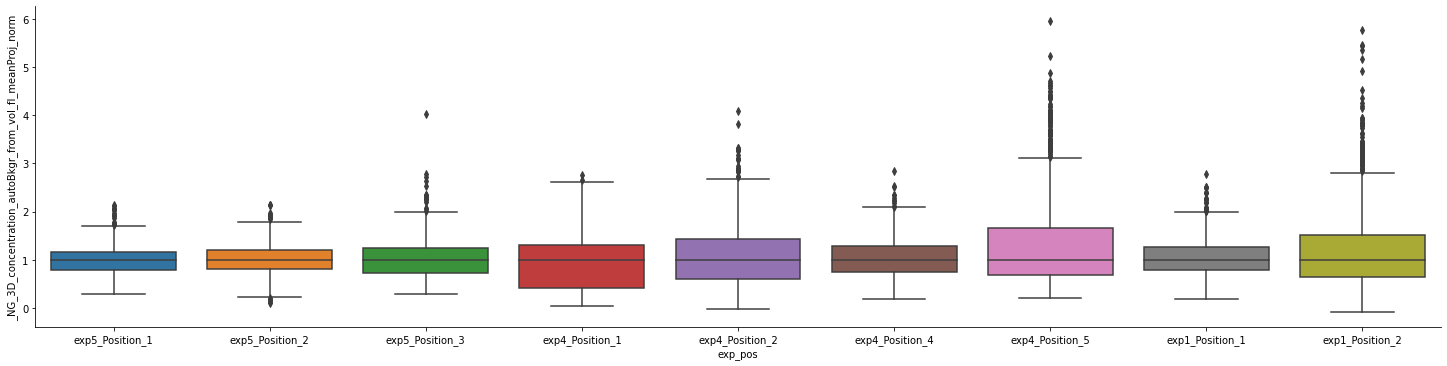

In [13]:
sns.catplot(
    data=df_norm_3,
    x="exp_pos",
    y="_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm",
    height=5,
    aspect=20 / 5,
    kind="box",
)
#plt.ylim(-0.5,10)

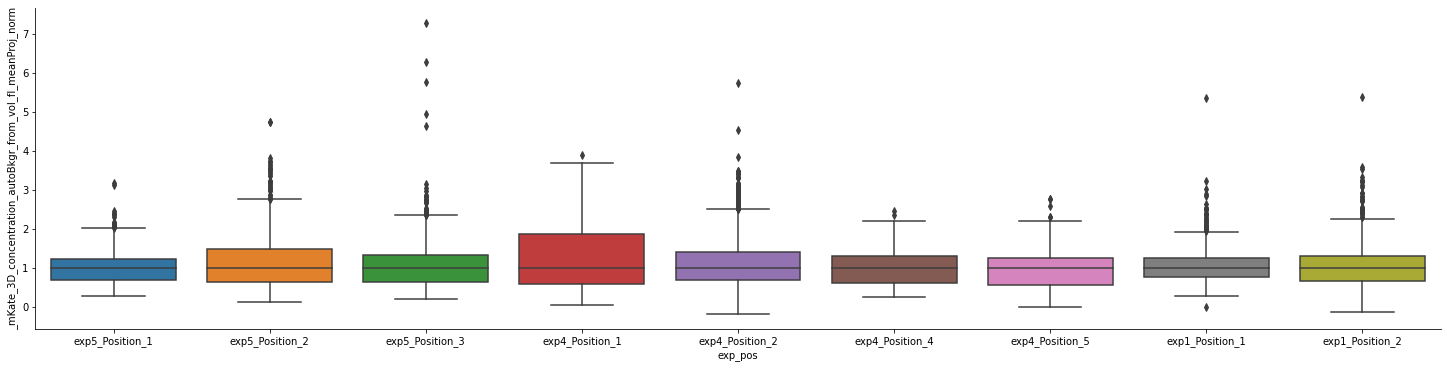

In [14]:
sns.catplot(
    data=df_norm_3,
    x="exp_pos",
    y="_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm",
    height=5,
    aspect=20 / 5,
    kind="box",
)
#plt.ylim(-0.5,10)

In [15]:
df_norm_3["h"] = (
    df_norm_3._mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm
    / (df_norm_3._NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm + df_norm_3._mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm)
)

In [16]:
# new column with homoplasmy type in order to concat the two homoplasmic dfs and be able to distinguish
homo_ng_cells['homoplasmy'] = 'ng'
homo_mk_cells['homoplasmy'] = 'mk'
homo_df = pd.concat([homo_mk_cells, homo_ng_cells], ignore_index=True)

In [17]:
# normalise haploid non-mated cells to the normalising factors the diploid cells are normalised to
homo_norm_df = pd.merge(
    homo_df, normalization_factors_3, left_on=["exp_pos"], right_on=["exp_pos"]
)
homo_norm_df

,experiment_foldername,Position_n,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,division_frame_i,emerg_frame_i,generation_num,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj,exp_pos,exp_pos_cell,time,homoplasmy,ng_norm_factor,mkate_norm_factor
0,exp5,Position_1,32,1300,mother,-1.0,126.644900,-1.0,-1.0,2.0,46.663282,61.876423,799.155752,1234.903566,exp5_Position_1,exp5_Position_1_1300,8.0,mk,995.254531,563.957893
1,exp5,Position_1,32,1300,mother,-1.0,126.644900,-1.0,-1.0,2.0,46.663282,61.876423,799.155752,1234.903566,exp5_Position_1,exp5_Position_1_1300,8.0,mk,916.479753,527.853218
2,exp5,Position_1,32,1300,mother,-1.0,126.644900,-1.0,-1.0,2.0,46.663282,61.876423,799.155752,1234.903566,exp5_Position_1,exp5_Position_1_1300,8.0,mk,1829.195543,918.273603
3,exp5,Position_1,32,1300,mother,-1.0,126.644900,-1.0,-1.0,2.0,46.663282,61.876423,799.155752,1234.903566,exp5_Position_1,exp5_Position_1_1300,8.0,mk,1403.174293,708.707292
4,exp5,Position_1,32,1300,mother,-1.0,126.644900,-1.0,-1.0,2.0,46.663282,61.876423,799.155752,1234.903566,exp5_Position_1,exp5_Position_1_1300,8.0,mk,1374.963613,706.545719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,exp4,Position_5,32,1046,mother,-1.0,74.499975,-1.0,-1.0,2.0,53.801872,9.238098,1157.841238,1019.056915,exp4_Position_5,exp4_Position_5_1046,8.0,mk,622.053876,1100.471564
821,exp4,Position_5,32,1046,mother,-1.0,74.499975,-1.0,-1.0,2.0,53.801872,9.238098,1157.841238,1019.056915,exp4_Position_5,exp4_Position_5_1046,8.0,mk,575.144752,1234.127978
822,exp4,Position_5,32,1046,mother,-1.0,74.499975,-1.0,-1.0,2.0,53.801872,9.238098,1157.841238,1019.056915,exp4_Position_5,exp4_Position_5_1046,8.0,mk,580.330736,1359.089513
823,exp4,Position_5,32,1046,mother,-1.0,74.499975,-1.0,-1.0,2.0,53.801872,9.238098,1157.841238,1019.056915,exp4_Position_5,exp4_Position_5_1046,8.0,mk,557.672726,1381.229159


In [18]:
homo_norm_df["_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm"] = (
    homo_norm_df._NG_3D_concentration_autoBkgr_from_vol_fl_meanProj / homo_norm_df.ng_norm_factor
)
homo_norm_df["_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm"] = (
    homo_norm_df._mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj / homo_norm_df.mkate_norm_factor
)

In [19]:
homo_norm_df["h"] = (
    homo_norm_df._mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm
    / (homo_norm_df._NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm + homo_norm_df._mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm)
)

In [19]:
#correction of mKate_concentration_autoBkgr_from_vol_fl_norm and NG_concentration_autoBkgr_from_vol_fl_norm for autofluorescence
#by subtracting the median of mKate_haploids and median of NG_haploids

homo_ng = homo_norm_df[homo_norm_df['homoplasmy'] == 'ng']
# Calculate the median of 'mKate_conc' column of homo_ng cells
median_mk_homong = homo_ng['_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm'].median()

homo_mk = homo_norm_df[homo_norm_df['homoplasmy'] == 'mk']
# Calculate the median of 'mKate_conc' column of homo_ng cells
median_ng_homomk = homo_mk['_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm'].median()

print(median_mk_homong, median_ng_homomk)

0.31843753339315795 0.06060400320083003


In [26]:
# correction of bleed-trhough fluorescence
df_norm_3["_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_cor"] = (
    df_norm_3._mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm - median_mk_homong)

df_norm_3["_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_cor"] = (
    df_norm_3._NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm - median_ng_homomk)

In [27]:
# heteroplasmy calculation 
df_norm_3["h_cor"] = (
    df_norm_3._mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_cor
    / (df_norm_3._NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_cor + df_norm_3._mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_cor)
)

In [28]:
count_below_zero = (df_norm_3['h']<0).sum()
count_below_zero 

# all values smaller -1 == -1! 

8

In [29]:
df_norm_3

,experiment_foldername,Position_n,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,division_frame_i,emerg_frame_i,generation_num,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj,exp_pos,exp_pos_cell,time,ng_norm_factor,mkate_norm_factor,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,h,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_cor,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_cor,h_cor
0,exp1,Position_1,0,1,mother,-1.0,207.564209,-1.0,-1.0,1.0,NaN,404.996239,NaN,135.358364,exp1_Position_1,exp1_Position_1_1,0.00,515.643388,144.680666,0.785419,0.935566,0.543622,0.636917,0.730682,0.465719
1,exp1,Position_1,1,1,mother,-1.0,222.670726,-1.0,-1.0,1.0,NaN,374.429163,NaN,138.977127,exp1_Position_1,exp1_Position_1_1,0.25,515.643388,144.680666,0.726140,0.960578,0.569496,0.661929,0.671403,0.496447
2,exp1,Position_1,2,1,mother,-1.0,271.437277,-1.0,-1.0,1.0,NaN,332.737695,NaN,134.873732,exp1_Position_1,exp1_Position_1_1,0.50,515.643388,144.680666,0.645286,0.932217,0.590944,0.633567,0.590549,0.517571
3,exp1,Position_1,3,1,mother,-1.0,248.630238,-1.0,-1.0,1.0,NaN,432.121268,NaN,155.842697,exp1_Position_1,exp1_Position_1_1,0.75,515.643388,144.680666,0.838023,1.077149,0.562429,0.778500,0.783286,0.498468
4,exp1,Position_1,4,1,mother,-1.0,289.113539,-1.0,-1.0,1.0,NaN,419.805957,NaN,154.794215,exp1_Position_1,exp1_Position_1_1,1.00,515.643388,144.680666,0.814140,1.069903,0.567876,0.771253,0.759403,0.503871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11557,exp5,Position_3,32,198,bud,75.0,28.929295,-1.0,32.0,0.0,1494.779052,1483.836116,912.019974,882.838811,exp5_Position_3,exp5_Position_3_198,8.00,1001.269747,549.238377,1.481954,1.607387,0.520301,1.308738,1.427217,0.478348
11558,exp5,Position_3,32,199,bud,47.0,24.526189,-1.0,32.0,0.0,807.350797,796.726585,1188.857473,1160.526241,exp5_Position_3,exp5_Position_3_199,8.00,1001.269747,549.238377,0.795716,2.112974,0.726435,1.814324,0.740979,0.710023
11559,exp5,Position_3,32,200,bud,89.0,26.158387,-1.0,32.0,0.0,599.942328,589.281994,1148.401578,1119.974021,exp5_Position_3,exp5_Position_3_200,8.00,1001.269747,549.238377,0.588535,2.039140,0.776025,1.740490,0.533798,0.765290
11560,exp5,Position_3,32,201,bud,8.0,37.117358,-1.0,32.0,0.0,659.022945,649.616487,1676.373941,1651.290054,exp5_Position_3,exp5_Position_3_201,8.00,1001.269747,549.238377,0.648793,3.006509,0.822506,2.707859,0.594056,0.820088


In [21]:
lifetime = (
    (
        df_norm_3.groupby(["exp_pos", "Cell_ID"])["time"].agg(np.ptp)
    )  # ptp = point to point and this way we calculate the time a cell has existed
    .reset_index()
    .rename(columns={"time": "lifetime"})
)
lifetime

,exp_pos,Cell_ID,lifetime
0,exp1_Position_1,1,8.00
1,exp1_Position_1,2,6.75
2,exp1_Position_1,3,5.75
3,exp1_Position_1,4,5.50
4,exp1_Position_1,5,4.50
...,...,...,...
1290,exp5_Position_3,198,0.00
1291,exp5_Position_3,199,0.00
1292,exp5_Position_3,200,0.00
1293,exp5_Position_3,201,0.00


In [22]:
df_norm_3_time = df_norm_3.merge(
    lifetime,
    left_on=["exp_pos", "Cell_ID"],
    right_on=["exp_pos", "Cell_ID"],
    how="left",
)
df_norm_3_time

,experiment_foldername,Position_n,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,division_frame_i,emerg_frame_i,generation_num,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj,exp_pos,exp_pos_cell,time,ng_norm_factor,mkate_norm_factor,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,h,lifetime
0,exp5,Position_1,0,4,mother,-1.0,192.422420,-1.0,-1.0,1.0,998.311792,995.254531,558.862457,563.957893,exp5_Position_1,exp5_Position_1_4,0.00,995.254531,563.957893,1.000000,1.000000,0.500000,8.00
1,exp5,Position_1,1,4,mother,-1.0,231.171137,-1.0,-1.0,1.0,920.249378,916.479753,523.141186,527.853218,exp5_Position_1,exp5_Position_1_4,0.25,916.479753,527.853218,1.000000,1.000000,0.500000,8.00
2,exp5,Position_1,2,4,mother,12.0,225.112696,-1.0,-1.0,1.0,962.851917,959.913706,552.620776,557.517794,exp5_Position_1,exp5_Position_1_4,0.50,1829.195543,918.273603,0.524774,0.607137,0.536382,8.00
3,exp5,Position_1,2,12,bud,4.0,2.227694,-1.0,2.0,0.0,2709.892133,2698.477380,1260.004826,1279.029413,exp5_Position_1,exp5_Position_1_12,0.50,1829.195543,918.273603,1.475226,1.392863,0.485641,7.50
4,exp5,Position_1,3,4,mother,12.0,239.015157,-1.0,-1.0,1.0,925.495601,922.641627,536.718702,542.426648,exp5_Position_1,exp5_Position_1_4,0.75,1403.174293,708.707292,0.657539,0.765375,0.537893,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11569,exp1,Position_2,32,562,bud,185.0,11.247725,-1.0,31.0,0.0,55.661832,631.900982,18.195251,423.120059,exp1_Position_2,exp1_Position_2_562,8.00,338.454979,219.343176,1.867016,1.929032,0.508168,0.25
11570,exp1,Position_2,32,563,bud,289.0,9.213000,-1.0,31.0,0.0,-223.529719,423.195109,2.152131,456.607416,exp1_Position_2,exp1_Position_2_563,8.00,338.454979,219.343176,1.250373,2.081703,0.624747,0.25
11571,exp1,Position_2,32,564,bud,121.0,10.495331,-1.0,31.0,0.0,-519.229220,78.869222,222.752572,643.037963,exp1_Position_2,exp1_Position_2_564,8.00,338.454979,219.343176,0.233027,2.931652,0.926366,0.25
11572,exp1,Position_2,32,565,bud,298.0,11.262431,-1.0,31.0,0.0,573.958908,1153.977022,123.409998,530.990294,exp1_Position_2,exp1_Position_2_565,8.00,338.454979,219.343176,3.409544,2.420820,0.415209,0.25


In [23]:
df_norm_3_time.exp_pos.unique()

array(['exp5_Position_1', 'exp5_Position_2', 'exp5_Position_3',
       'exp4_Position_1', 'exp4_Position_2', 'exp4_Position_4',
       'exp4_Position_5', 'exp1_Position_1', 'exp1_Position_2'],
      dtype=object)

In [24]:
#get cells from the first 2hrs for 2hrs and cells from the last 2hrs for 2 hrs
first_last_timepoint = (
    df_norm_3_time.groupby(["exp_pos_cell"])
    .agg({"time": ["min", "max"]})
    .rename(columns={"min": "time_start", "max": "time_end"})
    .reset_index()
)

In [25]:
#get cells from the first 2hrs for 2hrs and cells from the last 2hrs for 2 hrs
first_last_timepoint

exp_pos_cell       time         
                          time_start time_end
0       exp1_Position_1_1       0.00      8.0
1     exp1_Position_1_118       5.75      8.0
2     exp1_Position_1_120       5.75      8.0
3     exp1_Position_1_124       5.75      8.0
4     exp1_Position_1_144       6.00      8.0
...                   ...        ...      ...
1290   exp5_Position_3_93       6.75      8.0
1291   exp5_Position_3_94       6.75      8.0
1292   exp5_Position_3_95       6.75      8.0
1293   exp5_Position_3_96       6.75      8.0
1294   exp5_Position_3_97       6.75      8.0

[1295 rows x 3 columns]

In [26]:
df_norm_3_time = df_norm_3_time.merge(
    first_last_timepoint,
    left_on=["exp_pos_cell"],
    right_on=["exp_pos_cell"],
    how="left",
)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [27]:
column_names = df_norm_3_time.columns.tolist()

# Rename the last two columns
new_column_names = column_names[:-2] + ['time_start', 'time_end']
df_norm_3_time.columns = new_column_names
df_norm_3_time

,experiment_foldername,Position_n,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,division_frame_i,emerg_frame_i,generation_num,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj,exp_pos,exp_pos_cell,time,ng_norm_factor,mkate_norm_factor,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,h,lifetime,time_start,time_end
0,exp5,Position_1,0,4,mother,-1.0,192.422420,-1.0,-1.0,1.0,998.311792,995.254531,558.862457,563.957893,exp5_Position_1,exp5_Position_1_4,0.00,995.254531,563.957893,1.000000,1.000000,0.500000,8.00,0.00,8.0
1,exp5,Position_1,1,4,mother,-1.0,231.171137,-1.0,-1.0,1.0,920.249378,916.479753,523.141186,527.853218,exp5_Position_1,exp5_Position_1_4,0.25,916.479753,527.853218,1.000000,1.000000,0.500000,8.00,0.00,8.0
2,exp5,Position_1,2,4,mother,12.0,225.112696,-1.0,-1.0,1.0,962.851917,959.913706,552.620776,557.517794,exp5_Position_1,exp5_Position_1_4,0.50,1829.195543,918.273603,0.524774,0.607137,0.536382,8.00,0.00,8.0
3,exp5,Position_1,2,12,bud,4.0,2.227694,-1.0,2.0,0.0,2709.892133,2698.477380,1260.004826,1279.029413,exp5_Position_1,exp5_Position_1_12,0.50,1829.195543,918.273603,1.475226,1.392863,0.485641,7.50,0.50,8.0
4,exp5,Position_1,3,4,mother,12.0,239.015157,-1.0,-1.0,1.0,925.495601,922.641627,536.718702,542.426648,exp5_Position_1,exp5_Position_1_4,0.75,1403.174293,708.707292,0.657539,0.765375,0.537893,8.00,0.00,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11569,exp1,Position_2,32,562,bud,185.0,11.247725,-1.0,31.0,0.0,55.661832,631.900982,18.195251,423.120059,exp1_Position_2,exp1_Position_2_562,8.00,338.454979,219.343176,1.867016,1.929032,0.508168,0.25,7.75,8.0
11570,exp1,Position_2,32,563,bud,289.0,9.213000,-1.0,31.0,0.0,-223.529719,423.195109,2.152131,456.607416,exp1_Position_2,exp1_Position_2_563,8.00,338.454979,219.343176,1.250373,2.081703,0.624747,0.25,7.75,8.0
11571,exp1,Position_2,32,564,bud,121.0,10.495331,-1.0,31.0,0.0,-519.229220,78.869222,222.752572,643.037963,exp1_Position_2,exp1_Position_2_564,8.00,338.454979,219.343176,0.233027,2.931652,0.926366,0.25,7.75,8.0
11572,exp1,Position_2,32,565,bud,298.0,11.262431,-1.0,31.0,0.0,573.958908,1153.977022,123.409998,530.990294,exp1_Position_2,exp1_Position_2_565,8.00,338.454979,219.343176,3.409544,2.420820,0.415209,0.25,7.75,8.0


In [28]:
df_norm_3_time['time_alive'] = df_norm_3_time['time']-df_norm_3_time['time_start']

In [29]:
df_norm_3_time.to_csv("df_norm_3_time_all_median.csv")

In [31]:
#df_norm_3.to_csv("df_norm_3_median.csv")

In [30]:
homo_norm_df.to_csv("homo_norm_df_median.csv")

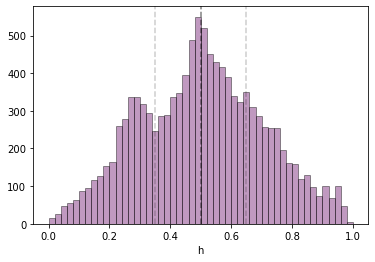

In [41]:
plt.hist(df_norm_3_time['h'], bins=50, range=(0,1), edgecolor='black', color='#620062', alpha = 0.4)
plt.xlabel('h')
plt.axvline(x=0.5, color='k', linestyle='--', alpha = 0.5) 
plt.axvline(x=0.35, color='k', linestyle='--', alpha = 0.2) 
plt.axvline(x=0.65, color='k', linestyle='--', alpha = 0.2) 